# Project - Convolutional Neural Networks: Street View Housing Number Digit Recognition

**Marks: 30**

Dear Learner,

Welcome to project on Classification using Convolutional Neural Networks. We will work with the same dataset that we used for the Neural Network project: Street View Housing Numbers image dataset.

Do read the problem statement and the guidelines around the same.

----
### Context: 
-------

The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate into all sorts of projects.

---------
### Objective:
------------
The objective of the exercise is to perform an image classification exercise on the given dataset to come up with a model that can help identify the digit images which have issues like picture brightness, blurriness. 

--------
### More about the dataset
------------
- The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

---------------------------
### Guidelines
-----------------------------------------
- Note that some of the questions are similar to the ones asked in the previous project. Semi filled codes are not provided in those cases.
- You need to download the dataset from the given link and add it to your drive. Use colab for this exercise. 
- You will need to mount the drive and give proper path to read the dataset.
- The exercise consists of semi written code blocks. You need to fill the blocks as per the instructions to achieve the required results.
- To be able to complete the assessment in the expected time, do not change the variable names. The codes might throw errors when the names are changed. 
- The marks of each requirement is mentioned in the question.
- You can raise your issues on the discussion forum on the Olympus.
- Uncomment the code snippets and work on them
--------------------------------------------
Wishing you all the best!





### Mount the drive
Let us start by mounting the drive.

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Let us check for the version of installed tensorflow.

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


### Load the dataset
- Let us now, load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [3]:
import h5py
import numpy as np

# Open the file as readonly
# Make changes in path as required
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]


# Close this file
h5f.close()

Let us import the required libraries now.

In [4]:
## Importing the required libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

### Visualising images (1.5 marks)
- Use X_train to visualise the first 10 images. (1 marks)
- Use Y_train to print the first 10 labels (0.5 mark)

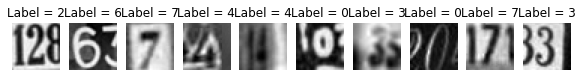

In [5]:
# visualizing the first 10 images in the dataset and their labels
# Your code here
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10, i+1)
    plt.imshow(X_train[i], plt.cm.binary)
    plt.title("Label = {}".format(y_train1[i])) # show label as the title
    plt.axis('off')
plt.show()

### Data preparation (6 marks)

- Print the first image in the train image and figure out the shape of the images (0.5 mark)
- Reshape the train and the test dataset to make them fit the first convolutional operation that we will create later. Figure out the required shape (3 marks)
- Normalise the train and the test dataset by dividing by 255. (1 mark)
- Print the new shapes of the train and the test set. (0.5 mark)
- One hot encode the target variables (1 marks)

In [6]:
# Shape of the images and the first image
# Your code here
print("First image:\n", X_train[0])

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [7]:
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 3D data where there is just one channel

#Uncomment below to answer
x_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
x_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [8]:
# Normalize inputs from 0-255 to 0-1

# Your code here
x_train = x_train/255
x_test = x_test/255

In [9]:
# New shape 

#Your code here
print("Shape of training data: ", x_train.shape)
print("Shape of test data: ", x_test.shape)

Shape of training data:  (42000, 32, 32, 1)
Shape of test data:  (18000, 32, 32, 1)


In [16]:
# one hot encode output
# Your code here
y_train = to_categorical(y_train1)
y_test = to_categorical(y_test1)

In [17]:
# shape 
y_train.shape, y_test.shape

((42000, 10), (18000, 10))

### Model Building (7 marks)
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with 16 filters and kernel size =3. Use the 'same' padding and provide apt input shape.
 - Add a leaky relu layer next with the value 0.1
 - First Convolutional layer with 32 filters and kernel size =3. Use the 'same' padding.
 - Another leakyRelu same as above.
 - A maxpooling layer with pool size of 2
 - Flatten the output from the previous layer
 - Add a dense layer with 32 nodes
 - Add a leakyRelu layer with slope(0.1)
 - Add the final output layer with nodes equal to the number of classes and softmax activation.
 - Compile the model with the categorical_crossentropy loss, adam optmizers (lr = 0.001) and accuracy metric.
- Do not fit the model here, just return the compiled model
- Call the model and print the model summary
- Fit the model on the train data with a validation split of 0.2, batch size = 32, verbose = 1 and 20 epochs. Store the model building history to use it later for visualisation.


In [25]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers

# Uncomment below to answer

def cnn_model_1():
     model_1 = Sequential()
  #Your code here
     model_1.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(32,32,1)))
  # Leaky relu layer with slope 0.1
     model_1.add(LeakyReLU(0.1))
  #Convolutional layer with 32 filters, kernel size =3,  'same' padding.
     model_1.add(Conv2D(filters=32, kernel_size=3, padding='same'))
  #LeakyRelu layer with slope(0.1)
     model_1.add(LeakyReLU(0.1))
  # A maxpooling layer with pool size of 2
     model_1.add(MaxPool2D(pool_size=2))
  # Flatten the output 
     model_1.add(Flatten())
  # Dense layer with 32 nodes
     model_1.add(Dense(32))
  #LeakyRelu layer with slope(0.1)
     model_1.add(LeakyReLU(0.1))
  # Final output layer
     model_1.add(Dense(10, activation='softmax'))

  # adam optimizer (lr = 0.001) and accuracy metric
  # optimizer
     adam = optimizers.Adam(lr=0.001)
  # compile model
     model_1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
     return model_1

In [26]:
# Call the function and print the model summary

model_1 = cnn_model_1()
print(model_1.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)               

In [27]:
# Fit the model and save the history
# Uncomment below to answer

# Call the Model here
#model_1 = cnn_model_1()

history_model_1 = model_1.fit(x_train, y_train, validation_split=0.2, batch_size=32, verbose=1, epochs=20 )

Epoch 1/20
1050/1050 [==============================] - 43s 40ms/step - loss: 1.6126 - accuracy: 0.4400 - val_loss: 0.6305 - val_accuracy: 0.8211
Epoch 2/20
1050/1050 [==============================] - 42s 40ms/step - loss: 0.5654 - accuracy: 0.8367 - val_loss: 0.5596 - val_accuracy: 0.8410
Epoch 3/20
1050/1050 [==============================] - 42s 40ms/step - loss: 0.4602 - accuracy: 0.8689 - val_loss: 0.5029 - val_accuracy: 0.8610
Epoch 4/20
1050/1050 [==============================] - 41s 40ms/step - loss: 0.3879 - accuracy: 0.8870 - val_loss: 0.4815 - val_accuracy: 0.8626
Epoch 5/20
1050/1050 [==============================] - 41s 40ms/step - loss: 0.3447 - accuracy: 0.8980 - val_loss: 0.4520 - val_accuracy: 0.8763
Epoch 6/20
1050/1050 [==============================] - 42s 40ms/step - loss: 0.2922 - accuracy: 0.9125 - val_loss: 0.4523 - val_accuracy: 0.8782
Epoch 7/20
1050/1050 [==============================] - 42s 40ms/step - loss: 0.2624 - accuracy: 0.9221 - val_loss: 0.4965 -

### Plotting the validation and training accuracies (1.5 marks)

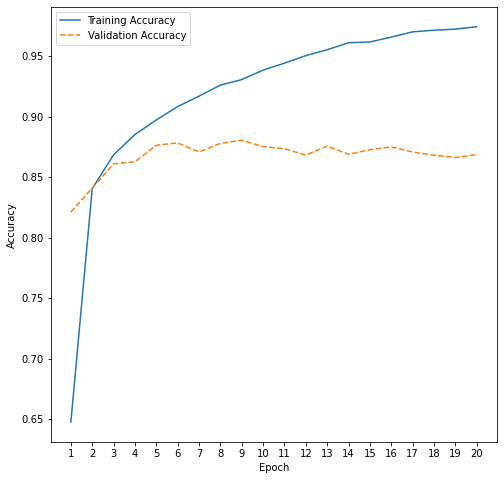

In [28]:
# plotting the accuracies

# Your code here
dict_hist = history_model_1.history

iepoch = [i for i in range(1,21)]

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(iepoch, dict_hist['accuracy'], ls='-', label='Training Accuracy')
ax.plot(iepoch, dict_hist['val_accuracy'], ls='--', label='Validation Accuracy')
ax.legend()
ax.set_xticks(iepoch)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
plt.show()

**Comments**


### Iteration 2 (12 marks)
- Experiment with adding dropout layers to make the model generalise better and report the results.
- Feel free to explore various architectures that can help you generalise better.
- Repeat all the steps done above and plot the results

In [54]:
# Uncomment below and complete

def cnn_model_2():
     # initialized a sequential model
        model_2 = Sequential()
#     # Your code here
        model_2.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(32,32,1)))
        model_2.add(LeakyReLU(0.1))
  # Dropout
        model_2.add(Dropout(0.2))
        model_2.add(Conv2D(filters=32, kernel_size=3, padding='same'))
        model_2.add(LeakyReLU(0.1))
  # Dropout
        model_2.add(Dropout(0.2))
        model_2.add(MaxPool2D(pool_size=2))
        
        model_2.add(Flatten())
        model_2.add(Dense(32))
        model_2.add(LeakyReLU(0.1))
  # Dropout
        model_2.add(Dropout(0.1))
        model_2.add(Dense(10, activation='softmax'))

  # optimizer
        adam = optimizers.Adam(lr=0.001)
  # compile model
        model_2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
        return model_2

In [55]:
#Call the function and print model summary

#Your code here
model_2 = cnn_model_2()
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)       

In [57]:
# Fit the model
# Uncomment below and complete
history_model_2 = model_2.fit(x_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=20 )

Epoch 1/20
263/263 [==============================] - 58s 220ms/step - loss: 2.1908 - accuracy: 0.1814 - val_loss: 1.0414 - val_accuracy: 0.7005
Epoch 2/20
263/263 [==============================] - 56s 215ms/step - loss: 0.9442 - accuracy: 0.7136 - val_loss: 0.6876 - val_accuracy: 0.8111
Epoch 3/20
263/263 [==============================] - 56s 214ms/step - loss: 0.6634 - accuracy: 0.8003 - val_loss: 0.5439 - val_accuracy: 0.8463
Epoch 4/20
263/263 [==============================] - 57s 216ms/step - loss: 0.5481 - accuracy: 0.8318 - val_loss: 0.5021 - val_accuracy: 0.8536
Epoch 5/20
263/263 [==============================] - 57s 216ms/step - loss: 0.4917 - accuracy: 0.8479 - val_loss: 0.4943 - val_accuracy: 0.8530
Epoch 6/20
263/263 [==============================] - 55s 210ms/step - loss: 0.4562 - accuracy: 0.8583 - val_loss: 0.4748 - val_accuracy: 0.8630
Epoch 7/20
263/263 [==============================] - 56s 212ms/step - loss: 0.4251 - accuracy: 0.8700 - val_loss: 0.4703 - val_ac

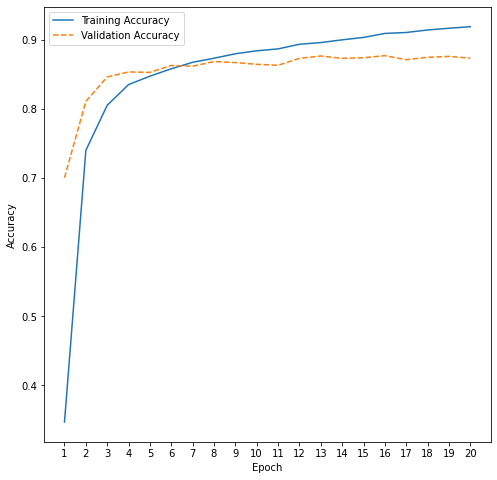

In [58]:
# plotting the accuracies

#Your code here
dict_hist2 = history_model_2.history

iepoch = [i for i in range(1,21)]

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(iepoch, dict_hist2['accuracy'], ls='-', label='Training Accuracy')
ax.plot(iepoch, dict_hist2['val_accuracy'], ls='--', label='Validation Accuracy')
ax.legend()
ax.set_xticks(iepoch)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
plt.show()

#### Comments:


### Test set prediction and final comments (Using the better model of the two iterations) (2 marks)
- predict on the test set and comment on the resultls obtained. (2 marks)


In [59]:
# predict on the test dataset
# Your code here
ypred2 = model_2.predict(x_test)
ypred2classes = np.argmax(ypred2, axis=1)
ypred2clprob = np.max(ypred2, axis=1)

In [60]:
# Accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test1, ypred2classes)

0.8742222222222222

<AxesSubplot:>

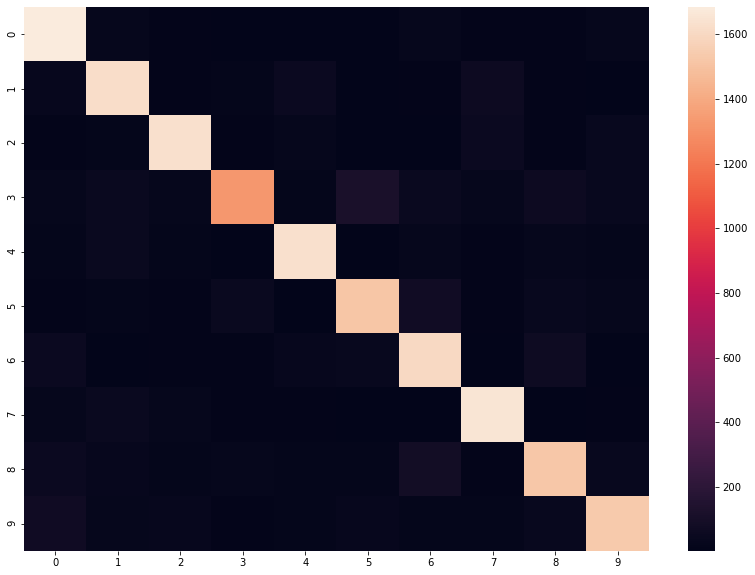

In [61]:
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(confusion_matrix(y_test1, ypred2classes))

#### Comments

